In [7]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from os import listdir
import calendar
query = pd.read_csv('drive/MyDrive/CS489_Project/full_query.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
query['genreName'] = query['genreName'].str.split('; ')
query = query.explode('genreName', ignore_index=True)
query = query[query['genreName'].str.contains("^[A-Za-z0-9\-]")]
print(query.sort_values('adjustedGross', ascending=False).head())

      Unnamed: 0                                     movie  \
1000         482     http://www.wikidata.org/entity/Q17738   
1001         482     http://www.wikidata.org/entity/Q17738   
101           41  http://www.wikidata.org/entity/Q23781155   
1138         544    http://www.wikidata.org/entity/Q274167   
359          164     http://www.wikidata.org/entity/Q11621   

                                   title genreName   grossNum  adjustedGross  \
1000  Star Wars: Episode IV – A New Hope    action  775398007     3956342955   
1001  Star Wars: Episode IV – A New Hope    sci-fi  775398007     3956342955   
101                    Avengers: Endgame    action 2797501328     3368095352   
1138                        The Exorcist    Horror  441306145     2938898332   
359           E.T. the Extra-Terrestrial    sci-fi  792910554     2546509218   

                                 grossUnit  duration               pubDate  \
1000  http://www.wikidata.org/entity/Q4917       121  1977-05-25T00:

genreName
sci-fi    595101511
action    592745175
fantasy   582540489
heist     535722260
Horror    281259828
Name: adjustedGross, dtype: float64


<Figure size 1000x600 with 0 Axes>

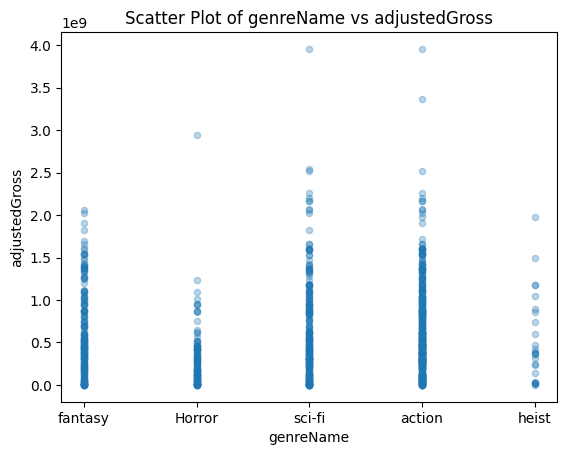

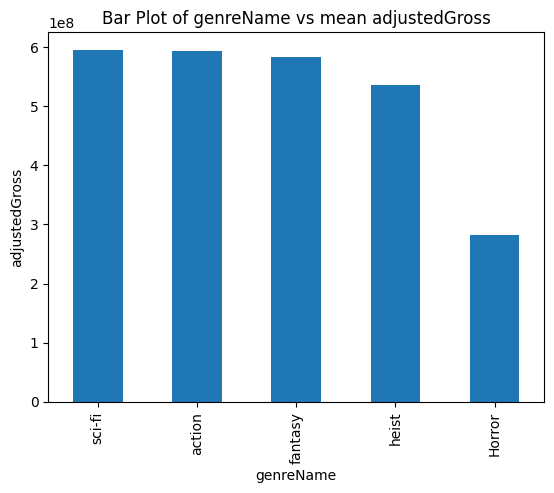

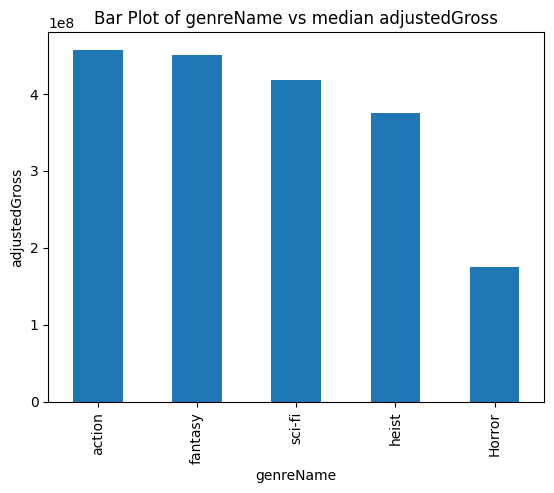

In [9]:
pd.options.display.float_format = '{:.0f}'.format
results = query.groupby('genreName')['adjustedGross'].mean().sort_values(ascending=False).head(5 )
print(results)
plt.figure(figsize=(10, 6))
query.plot(kind="scatter", x='genreName', y='adjustedGross', alpha=0.3)
plt.title('Scatter Plot of genreName vs adjustedGross')
plt.xlabel('genreName')
plt.ylabel('adjustedGross')
plt.show()
results.plot.bar(x='genreName', y='adjustedGross')
plt.title('Bar Plot of genreName vs mean adjustedGross')
plt.xlabel('genreName')
plt.ylabel('adjustedGross')
plt.show()
results = query.groupby('genreName')['adjustedGross'].median().sort_values(ascending=False).head(5 )
results.plot.bar(x='genreName', y='adjustedGross')
plt.title('Bar Plot of genreName vs median adjustedGross')
plt.xlabel('genreName')
plt.ylabel('adjustedGross')
plt.show()